# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [2]:
data=pd.read_excel('geo.xlsx')

In [3]:
data.head()

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108806 entries, 0 to 108805
Data columns (total 3 columns):
x                108806 non-null float64
y                108806 non-null float64
comment_class    108806 non-null int64
dtypes: float64(2), int64(1)
memory usage: 3.3 MB


# визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)

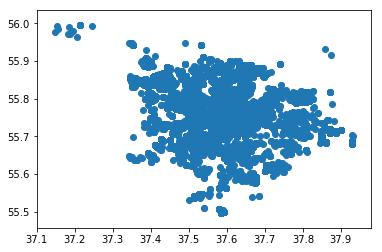

In [5]:
plt.scatter(data['x'],data['y'])

In [6]:
scaler=StandardScaler()
data_scaled=scaler.fit_transform(data[['x','y']])
data_scaled=pd.DataFrame({'x':data_scaled[:,0],'y':data_scaled[:,1], 'comment_class':data['comment_class']})

In [7]:
data_scaled.head()

,comment_class,x,y
0,-1,0.367919,0.159553
1,-1,0.367919,0.159553
2,-1,0.293178,-0.348131
3,-1,-0.073819,-0.539880
4,-1,-0.009022,-0.496273


In [8]:
#выберу 12 кластеров(по количеству округов в Москве)

In [9]:
kmeans=KMeans(n_clusters=12, random_state=20)

In [10]:
clusters=kmeans.fit_predict(data_scaled[['x','y']])

In [11]:
data_clusters=pd.DataFrame({'x':data_scaled['x'],'y':data_scaled['y'], 'cluster':clusters})

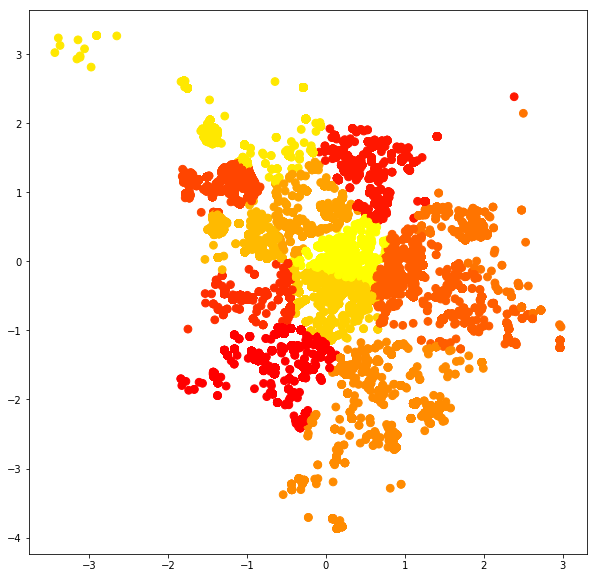

In [12]:
plt.figure(figsize=(10,10))
plt.scatter(data_clusters['x'], data_clusters['y'], c=data_clusters['cluster'], cmap='autumn', s=60)

# аналогично исследовать скопления голосов за и против отдельно

In [13]:
#положительные оценки
data_scaled_pos=data_scaled[data_scaled['comment_class']==1]

In [14]:
kmeans=KMeans(n_clusters=12, random_state=20)

In [15]:
clusters=kmeans.fit_predict(data_scaled_pos)

In [16]:
data_pos_clusters=pd.DataFrame({'x':data_scaled_pos['x'],'y':data_scaled_pos['y'], 'cluster':clusters})

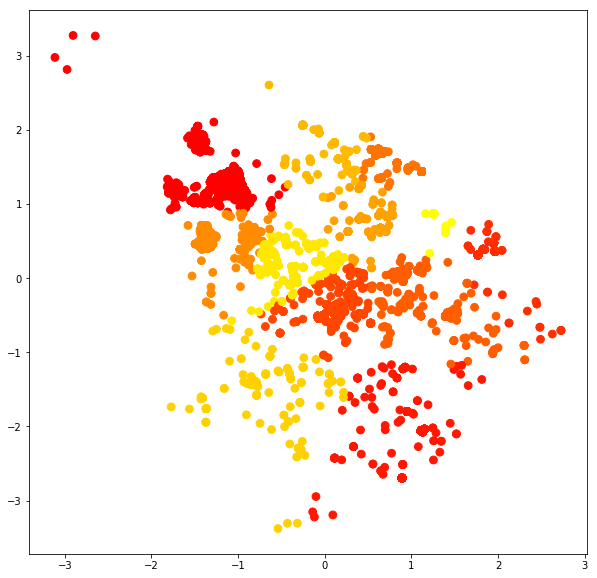

In [17]:
plt.figure(figsize=(10,10))
plt.scatter(data_pos_clusters['x'], data_pos_clusters['y'], c=data_pos_clusters['cluster'], cmap='autumn', s=60)

In [18]:
#отрицательные оценки
data_scaled_neg=data_scaled[data_scaled['comment_class']==-1]

In [19]:
kmeans=KMeans(n_clusters=12, random_state=20)

In [20]:
clusters = kmeans.fit_predict(data_scaled_neg)

In [21]:
data_neg_clusters=pd.DataFrame({'x':data_scaled_neg['x'],'y':data_scaled_neg['y'], 'cluster':clusters})

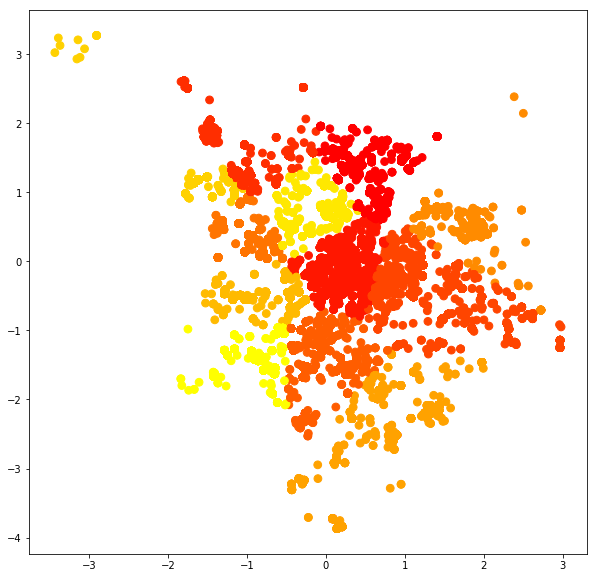

In [22]:
plt.figure(figsize=(10,10))
plt.scatter(data_neg_clusters['x'], data_neg_clusters['y'], c=data_neg_clusters['cluster'], cmap='autumn', s=60)

# подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)

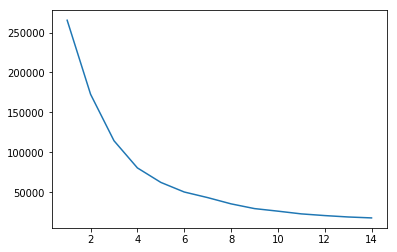

In [23]:
k_inertia = []
ks = range(1,15)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data_scaled)
    k_inertia.append(clf_kmeans.inertia_)
    
plt.plot(ks, k_inertia)

In [24]:
diff=np.diff(k_inertia)

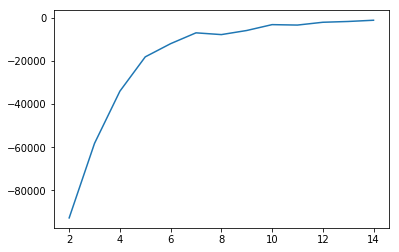

In [25]:
plt.plot(ks[1:],diff)

In [26]:
diff_r=diff[1:]/diff[:-1]

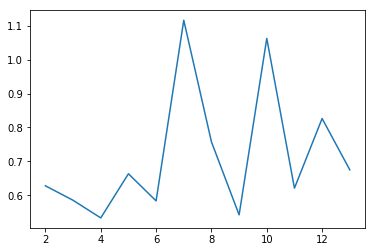

In [27]:
plt.plot(ks[1:-1],diff_r)

In [28]:
k_opt=ks[np.argmin(diff_r)+1]
k_opt

4

# Применение алгоритма DBSCAN для кластеризации

In [29]:
dbscan=DBSCAN(eps=0.09, metric='cityblock', min_samples=2)

In [30]:
clusters=dbscan.fit_predict(data_scaled)
data_dbscan_clusters=pd.DataFrame({'x':data_scaled['x'],'y':data_scaled['y'], 'cluster':clusters})

In [31]:
voting_list=data_dbscan_clusters.groupby('cluster').count().sort_values('x', ascending=False).head(5).index.values

In [32]:
data_dbscan_clusters['5_cluster']=data_dbscan_clusters.apply(lambda i: -999 if i.cluster not in voting_list else i.cluster, axis=1 )

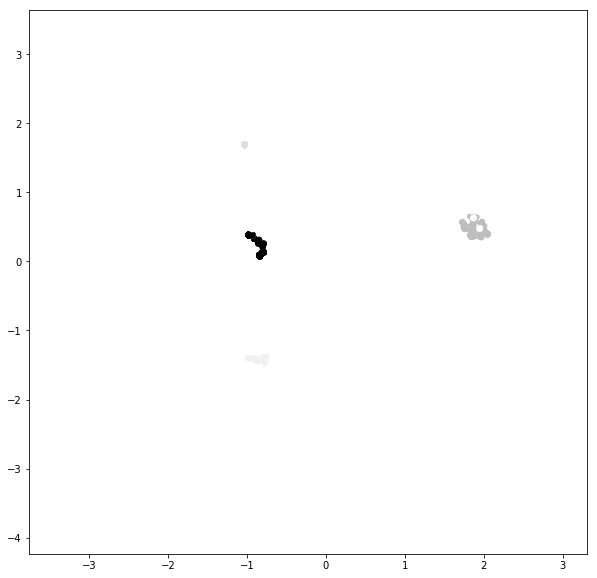

In [33]:
plt.figure(figsize=(10,10))
plt.scatter(data_dbscan_clusters['x'], data_dbscan_clusters['y'], c=data_dbscan_clusters['5_cluster'], cmap='Greys', s=30)